# Song popularity study
### Research question: To what extent can a song’s popularity be explained by its audio features? 
###### By Cecilia Iacometta, Nicholas Tiveron, Ginevra Cepparulo (Group 14)

In [133]:
import sys
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sn
from scipy import stats as st
import statsmodels.api as stmod
import statsmodels.formula.api as smf

In [134]:
# importing the data set information
cid = "d0d1766b90674135bacd3e011e20b7ab"
secret = "93a12c95f07d4c0aabc721b149b4eeb6"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
spotify = sp.Spotify(client_credentials_manager = client_credentials_manager)
genres = ['pop','rock','hip-hop','electronic','latin','indie','classical','k-pop','country','metal']
year = "2021"
dic  = {}
for genre in genres:
    tracks = spotify.search(q='genre:' + genre + ' AND year:' + year,type='track',market='IT',limit=50,offset=0)

    for item in tracks["tracks"]["items"]: 
        if item["id"] not in dic: 

            dic[item["id"]]={'name':item["name"],'popularity':item["popularity"],'artists':[artist["name"] for artist in item["artists"]],"genres": [genre]}

        else:

            dic[item['id']]['genres'].append(genre)

In [135]:
l = list(dic.keys())
u = l[:100]
v = l[100:200]
w = l[200:300]
x = l[300:400]
y = l[400:]

In [136]:
# creating the dataset
rows=[]
audio_features = spotify.audio_features(tracks=u)
columns = list(audio_features[0].keys())
for element in ['id','type','uri','track_href','analysis_url']:
    columns.remove(element)
for element in ['popularity','genres','artists','name','id']:
    columns.insert(0,element)

for lista in [u,v,w,x,y]:
    audio_features = spotify.audio_features(tracks=lista)
    for item in audio_features:
        item.update(dic[item['id']])
        for element in ['type','uri','track_href','analysis_url']:
            item.pop(element)

    for item in audio_features:
        row=[]
        for col in columns:
            row.append(item[col])
        rows.append(row)

In [137]:
# creating the Numpy array
array = np.array(rows)
  
# creating the dataframe
df = pd.DataFrame(data = array, 
                  columns = columns)
# displaying the dataframe
display(df)

/var/folders/zv/npnthj7x1k78dj2wjrvgsfj00000gn/T/ipykernel_43372/3007370808.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(rows)


,id,name,artists,genres,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,16EJNayKtC09M0Fi7Py47s,Finché Non Mi Seppelliscono,[BLANCO],[pop],74,0.727,0.833,4,-2.594,1,0.0316,0.349,0,0.232,0.86,130.024,168000,4
1,3uUuGVFu1V7jTQL60S1r8z,Where Are You Now,"[Lost Frequencies, Calum Scott]",[pop],89,0.671,0.636,6,-8.117,0,0.103,0.515,0.000411,0.172,0.262,120.966,148197,4
2,1x3Qb8np6S1UvpSLthwEJN,MI FAI IMPAZZIRE,"[BLANCO, Sfera Ebbasta]",[pop],72,0.477,0.844,11,-4.87,1,0.0458,0.00273,0,0.137,0.203,169.941,220235,4
3,1PWOkqMORYdGa0OEh2GaXM,Notti In Bianco,[BLANCO],[pop],70,0.599,0.79,6,-3.242,1,0.0422,0.359,0,0.105,0.693,75.004,176400,4
4,1eDC4NiUYgQSKpKDIvXxi4,Ferma A Guardare (feat. Pinguini Tattici Nucle...,"[Ernia, Pinguini Tattici Nucleari]","[pop, hip-hop, indie]",67,0.585,0.724,9,-5.611,0,0.0967,0.445,0,0.1,0.547,162.05,213543,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,6nDHNHOVNuWK48N24Fktcs,Wait A Minute My Girl,[Volbeat],[metal],63,0.409,0.936,1,-5.712,0,0.0524,0.00007,0.00126,0.622,0.678,183.981,140053,4
464,4EFb9FhLyFiDbYKwBwDZre,We Got the Moves,[Electric Callboy],[metal],66,0.595,0.808,5,-6.595,0,0.0564,0.00013,0.000017,0.103,0.712,149.989,206858,4
465,52KlXDEkCkgZxuMjSqzY4L,Last Resort (Reloaded),"[Papa Roach, Jeris Johnson]",[metal],64,0.639,0.684,2,-5.619,1,0.0353,0.00966,0,0.194,0.465,88.05,137297,4
466,1GWtUkDQk7XC35r7kTPfqx,Amazonia,[Gojira],[metal],58,0.382,0.954,9,-4.831,1,0.0417,0.00038,0.776,0.244,0.513,181.933,300783,4


In [138]:
df = df.astype({"loudness": float}, errors='raise') 
df = df.astype({"energy": float}, errors='raise') 
df = df.astype({"danceability": float}, errors='raise') 
df = df.astype({"speechiness": float}, errors='raise')
df = df.astype({"acousticness": float}, errors='raise')
df = df.astype({"instrumentalness": float}, errors='raise')
df = df.astype({"liveness": float}, errors='raise')
df = df.astype({"valence": float}, errors='raise')
df = df.astype({"tempo": float}, errors='raise')
df = df.astype({"duration_ms": int}, errors='raise')
df = df.astype({"popularity": int}, errors='raise') 

In [139]:
# we create an attribute for each artist and genre
dfx = pd.get_dummies(pd.DataFrame(df['artists'].tolist()).stack()).sum(level=0)
dfy = pd.get_dummies(pd.DataFrame(df['genres'].tolist()).stack()).sum(level=0)
df2 = pd.concat([df, dfx], axis=1).drop(columns=['artists'])
df2 = pd.concat([df2, dfy], axis=1).drop(columns=['genres'])
display(df2)

/var/folders/zv/npnthj7x1k78dj2wjrvgsfj00000gn/T/ipykernel_43372/972124287.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfx = pd.get_dummies(pd.DataFrame(df['artists'].tolist()).stack()).sum(level=0)
/var/folders/zv/npnthj7x1k78dj2wjrvgsfj00000gn/T/ipykernel_43372/972124287.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dfy = pd.get_dummies(pd.DataFrame(df['genres'].tolist()).stack()).sum(level=0)


,id,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,classical,country,electronic,hip-hop,indie,k-pop,latin,metal,pop,rock
0,16EJNayKtC09M0Fi7Py47s,Finché Non Mi Seppelliscono,74,0.727,0.833,4,-2.594,1,0.0316,0.349000,...,0,0,0,0,0,0,0,0,1,0
1,3uUuGVFu1V7jTQL60S1r8z,Where Are You Now,89,0.671,0.636,6,-8.117,0,0.1030,0.515000,...,0,0,0,0,0,0,0,0,1,0
2,1x3Qb8np6S1UvpSLthwEJN,MI FAI IMPAZZIRE,72,0.477,0.844,11,-4.870,1,0.0458,0.002730,...,0,0,0,0,0,0,0,0,1,0
3,1PWOkqMORYdGa0OEh2GaXM,Notti In Bianco,70,0.599,0.790,6,-3.242,1,0.0422,0.359000,...,0,0,0,0,0,0,0,0,1,0
4,1eDC4NiUYgQSKpKDIvXxi4,Ferma A Guardare (feat. Pinguini Tattici Nucle...,67,0.585,0.724,9,-5.611,0,0.0967,0.445000,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,6nDHNHOVNuWK48N24Fktcs,Wait A Minute My Girl,63,0.409,0.936,1,-5.712,0,0.0524,0.000070,...,0,0,0,0,0,0,0,1,0,0
464,4EFb9FhLyFiDbYKwBwDZre,We Got the Moves,66,0.595,0.808,5,-6.595,0,0.0564,0.000130,...,0,0,0,0,0,0,0,1,0,0
465,52KlXDEkCkgZxuMjSqzY4L,Last Resort (Reloaded),64,0.639,0.684,2,-5.619,1,0.0353,0.009660,...,0,0,0,0,0,0,0,1,0,0
466,1GWtUkDQk7XC35r7kTPfqx,Amazonia,58,0.382,0.954,9,-4.831,1,0.0417,0.000380,...,0,0,0,0,0,0,0,1,0,0


In [140]:
l = list(df2.columns)
l.remove('id')
l.remove('name')
l = ["Q(\'"+el+"\')" for el in l if el not in ["popularity","key","mode","time_signature", "danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
l = ["C("+el+")" for el in l if el not in ["popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
l+=["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]
l = " + ".join(l)

### Exploratory Data Analysis

We begin by plotting a correlation matrix and scatter plot matrix, in order to evaluate which are the variables that correlate with our dependent variable; popularity.

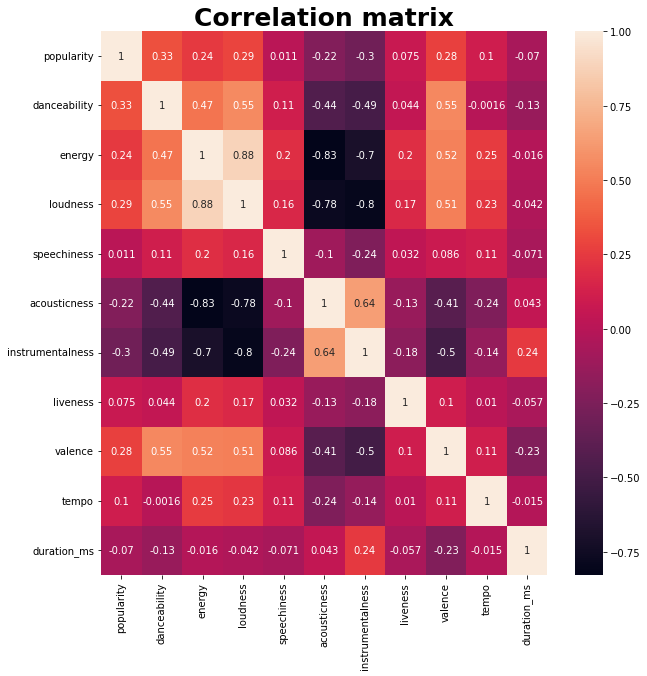

In [141]:
corrMatrix = df.corr()
plt.figure(figsize = (10, 10))
plt.title("Correlation matrix", fontsize=25, fontweight="bold")
sn.heatmap(corrMatrix, annot=True)
plt.show()

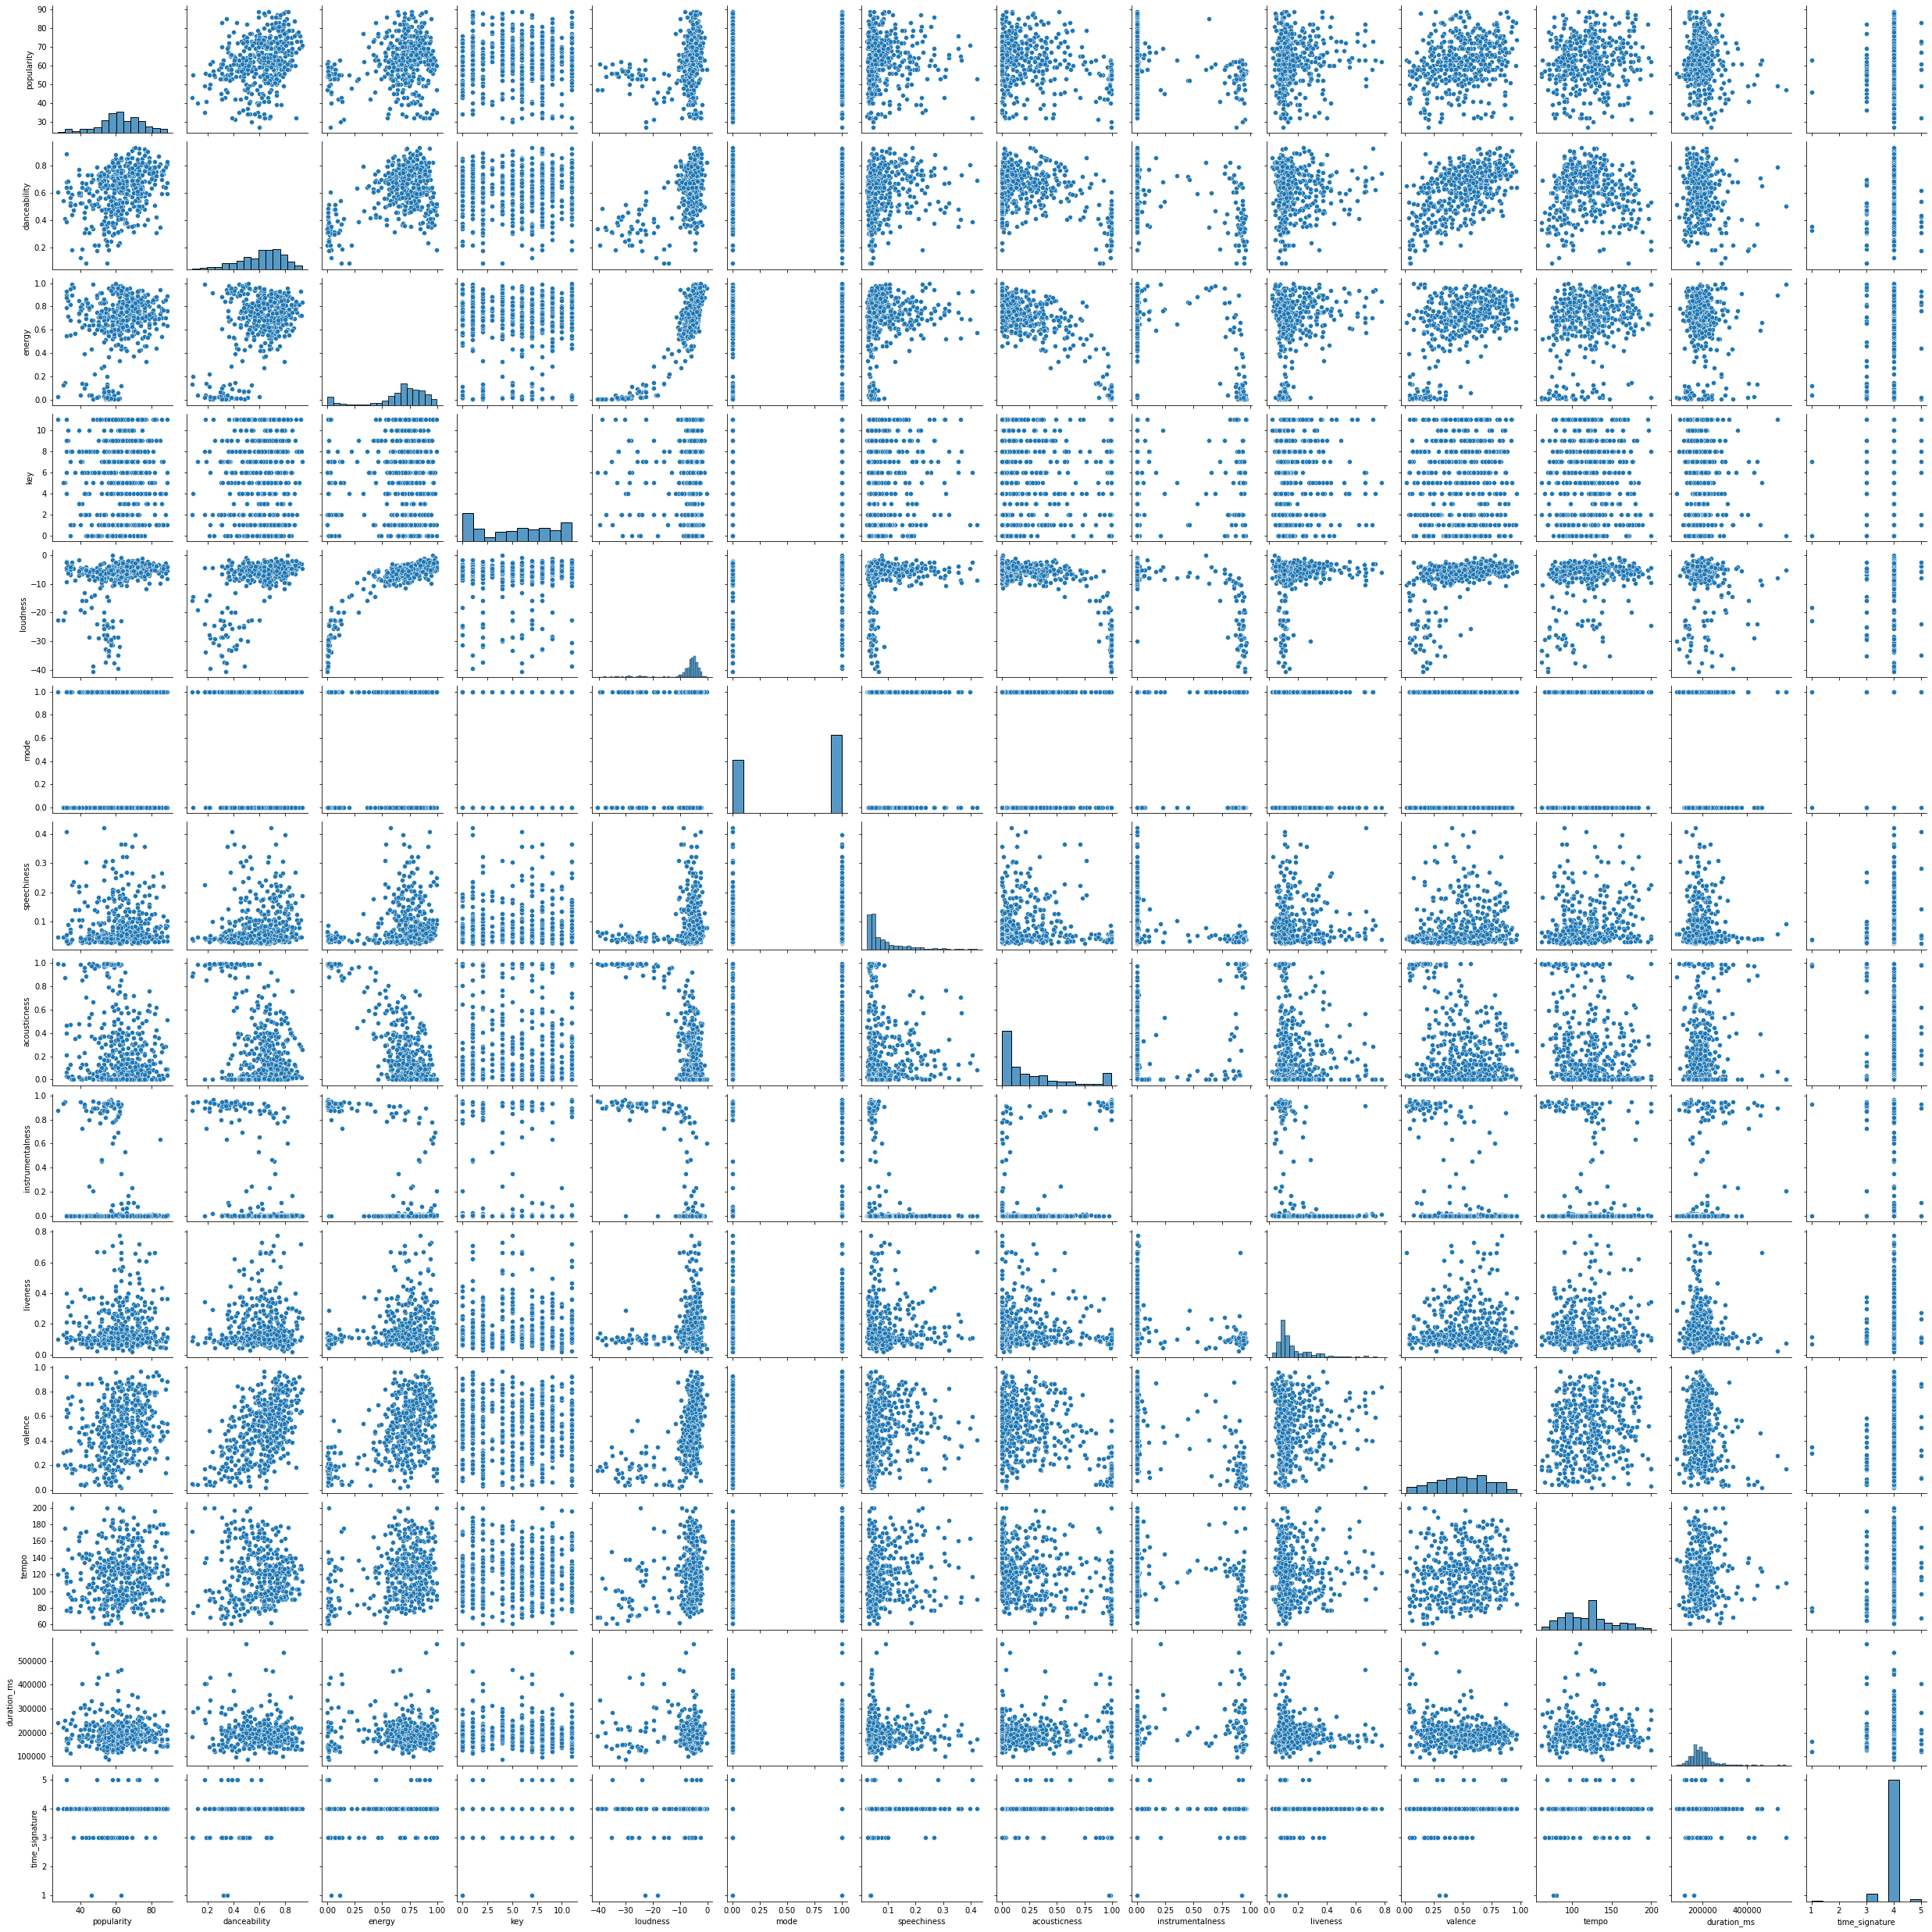

In [142]:
#pd.plotting.scatter_matrix(frame=df,figsize)
sn.pairplot(df)

We find that the variables that correlate with popularity are danceability, instrumentalness, valence, loudness and energy. However we also find that some independent variables correlate with each other. For example loudness and energy.

#### Bootstrapping the standard deviation of danceability

In [143]:
df.danceability.describe()

count    468.000000
mean       0.616837
std        0.163524
min        0.084400
25%        0.511000
50%        0.643500
75%        0.736000
max        0.930000
Name: danceability, dtype: float64

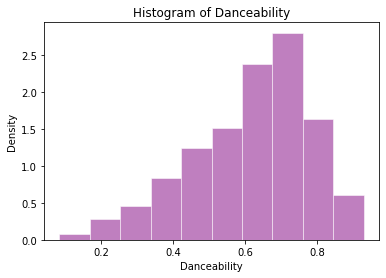

In [144]:
plt.hist(df.danceability, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
plt.title("Histogram of Danceability")
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.axis('tight')
plt.show()

In [145]:
B = 1000
boot_stat = np.zeros(B)

for b in range(B):
    x_boot       = df.danceability.sample(n = len(df), replace = True)
    boot_stat[b] = x_boot.std()

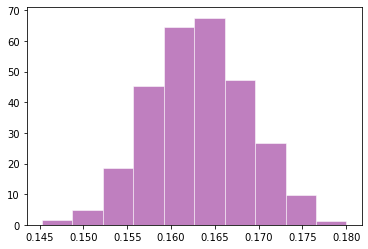

In [146]:
# the bootstrapped distribution of our statistics
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);

In [147]:
# Bootstrapped Standard Error
boot_stat.std()

0.005521368119647254

In [148]:
# Bootstrapped Variance
boot_stat.var()

3.048550591265706e-05

In [149]:
# Bootstrapped MSE | Using Decomposition
boot_stat.var() + (df.danceability.std() - boot_stat.mean())**2

3.061897895472769e-05

#### Bootstrapping the pearson correlation coefficient between danceability and energy

The correlation matrix shows that danceability and energy have a correlation of 0.47 (this is the plug - in estimate).

In [150]:
# Extract the plug-in estimate between danceability and energy
hat_rho = df.corr().iloc[1,2]
print(hat_rho)

0.47031527739379175


In [151]:
B = 1000
boot_stat = np.zeros(B)

for b in range(B):
    x_boot = df.sample(n = len(df), replace = True)
    boot_stat[b] = x_boot.corr().iloc[1,2]

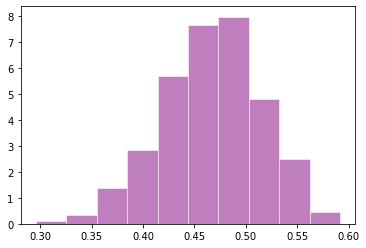

In [152]:
# the bootstrapped distribution of our statistics
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);

In [153]:
# Nonparametric Bootstrap Estimate of the Standard Error for the plug-in estimator of Pearson Correlation
boot_stat.std()

0.04757308947826167

In [154]:
# Nonparametric Bootstrap Estimate of the Variance for the plug-in estimator of Pearson Correlation
boot_stat.var()

0.0022631988425066913

In [155]:
# Nonparametric Bootstrap Estimate of the Bias2 for the plug-in estimator of Pearson Correlation
(boot_stat.mean() - hat_rho)**2

1.1217264351050752e-05

#### Fitting a Gamma model to liveness

The scatter plot matrix shows that liveness could follow Gamma model. Therefore we will attempt to do this.

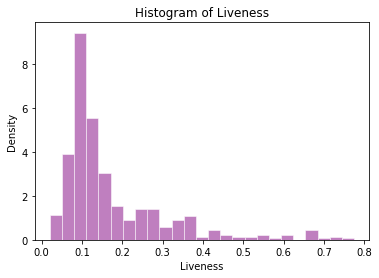

In [156]:
plt.hist(df.liveness, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5,bins=25);
plt.title("Histogram of Liveness")
plt.xlabel('Liveness')
plt.ylabel('Density')
plt.axis('tight')
plt.show()

In [157]:
# MLE default method
hat_alpha, hat_loc, hat_beta = st.gamma.fit(df.liveness, floc = 0)   # Force `loc` to be zero
print(hat_alpha, hat_loc, hat_beta)

2.448295322515752 0 0.0705019585657052


In [158]:
# the fitted model
rv_fit  = st.gamma(a = hat_alpha, loc = hat_loc, scale = hat_beta)

v_grid  = np.linspace(0, df.liveness.max(), num = 501)
pdf_val = rv_fit.pdf(v_grid)

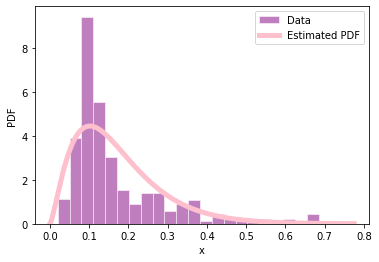

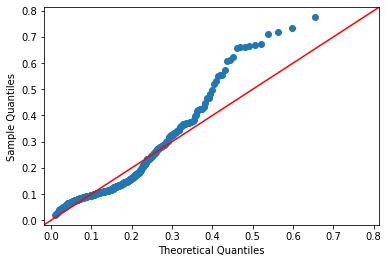

In [159]:
# Plot 01
plt.hist(df.liveness, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5,
        label = "Data",bins=25);
plt.plot(v_grid, pdf_val, '#fdc0cc', linewidth = 5,
        label = "Estimated PDF");
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc='upper right');
plt.show()

# Plot 02 
stmod.qqplot(data = df.liveness, dist = st.gamma(hat_alpha, hat_loc, hat_beta), 
             line='45', fmt='b')
plt.show()

The first plots shows that the PDF is not such a good estimate, the QQ plot highlights that a transformation to the data might be necessary since there is a somewhat sinosoidal correlation in the graph and a deviation from the straight line especially at higher quantiles.

In [160]:
# the MLEs for these two population quantities
rv_fit.stats()

(array(0.17260962), array(0.01216932))

In [161]:
# by hand
hat_mu = hat_alpha*hat_beta + hat_loc 
print(hat_mu)

0.1726096153846154


In [162]:
# Evaluating the Standard Error of the Mean Estimator
B = 500
boot_stat = np.zeros(B)

for b in range(B):
    x_bt             = rv_fit.rvs( len(df.liveness) )      
    a_bt, l_bt, b_bt = st.gamma.fit(x_bt, floc = 0)      
    boot_stat[b]     = a_bt*b_bt + l_bt     

In [163]:
print( boot_stat.std() )               # Bootstrapped estimate of the Standard Error
print( boot_stat.mean() - hat_mu )     # Bootstrapped estimate of the Bias

0.005111102672290434
-3.452817236948569e-05


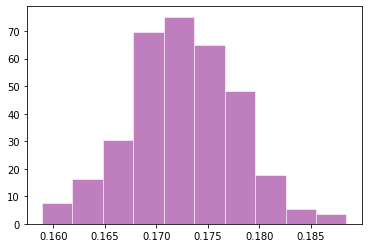

In [164]:
# the bootstrapped distribution of the mean
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);

#### let's draw some scatter plots...

The scatter plot matrix shows that energy and acousticness have a non linear relationship similar to a square root. In order to transform the relationship into a linear one we deem appropriate to make a square transformation on the energy variable.

Text(0, 0.5, 'acousticness')

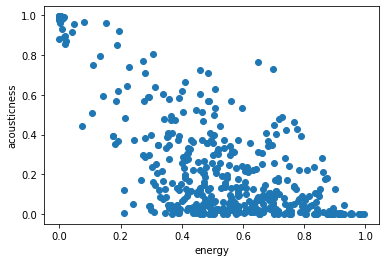

In [165]:
plt.scatter(df['energy']**2,df['acousticness'])
plt.xlabel('energy')
plt.ylabel('acousticness')

In [166]:
df['energy2'] = df['energy']**2

In [167]:
fitd = smf.ols(formula = 'acousticness ~ energy2', data = df).fit()

fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     592.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           4.99e-85
Time:                        17:33:52   Log-Likelihood:                 80.558
No. Observations:                 468   AIC:                            -157.1
Df Residuals:                     466   BIC:                            -148.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7292      0.021     34.007      0.000       0.687       0.771
energy2       -0.9319      0.038    -24.336      0.000      -1.007      -0.857
==============================================================================
Omnibus:                        9.804   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.072
Skew:                           0.103   Prob(JB):                       0.0480
Kurtosis:                       2.481   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model estimated coefficients are $\widehat{\beta}_0 = 0.7243$ and $\widehat{\beta}_1 = -0.9232$. The regression function is $\widehat{\mu} = 0.7243 - 0.9232x$. Let's derive the coefficients using the formulas $\widehat{\beta}_1 = \frac{s_{xy}}{s^2_x}$ and $\widehat{\beta}_0 = \bar{y} - \widehat{\beta}_1 \bar{x}$

Let's manually derive the estimated coefficients:

In [168]:
x     = df['energy2']
y     = df['acousticness']
s2_x  = np.cov(x, y)[0,0]
s_xy  = np.cov(x, y)[0,1]
beta1 = s_xy/s2_x
beta0 = np.mean(y) - beta1*np.mean(x)
print(beta1, beta0)

-0.9319065483621047 0.7291507086254441


In [169]:
yhat = beta0 + beta1*x
#yhat = fitd.predict()
yhat.head(5)

0    0.082511
1    0.352198
2    0.065320
3    0.147548
4    0.240668
Name: energy2, dtype: float64

These are the errors:

In [170]:
e = y - yhat
e.head(5)

0    0.266489
1    0.162802
2   -0.062590
3    0.211452
4    0.204332
dtype: float64

Let's derive the estimate of the error variance.

In [171]:
n   = len(x)
SSE = np.sum(e**2)
s2  = SSE/(n-2)
print(s2)

0.041674757696189384


Let's derive the standard errors of the predicted coefficients.

In [172]:
var_beta1 = s2/((n-1)*s2_x)
sd_beta1  = np.sqrt(var_beta1)
var_beta0 = s2*np.sum(x**2)/(n*np.sum((x-np.mean(x))**2))
sd_beta0  = np.sqrt(var_beta0)
print(sd_beta1, sd_beta0)

0.03829317085723929 0.021441379521635592


We will compute the R value.

In [173]:
s2_y = np.cov(x, y)[1,1] 
r    = s_xy/(np.sqrt(s2_x)*np.sqrt(s2_y))
print(r)

-0.7480966936077887


The R squared value.

In [174]:
R2   = r**2
print(R2)

0.5596486629869057


The adujsted R squared value.

In [175]:
adj_R2 = 1 - ((n-1)/(n-2))*(1 - R2)
print(adj_R2)

0.5587037030362338


We notice that the R squared value is not very high, this highlights that the acousticness is not so much explained by the transformed energy.

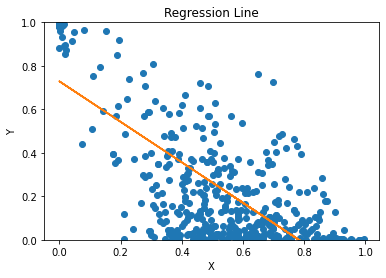

In [176]:
from matplotlib import pyplot as plt 
plt.title("Regression Line") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.plot(x, y, "o") 
plt.plot(x, beta1*x + beta0)
plt.ylim([0,1])
plt.show()

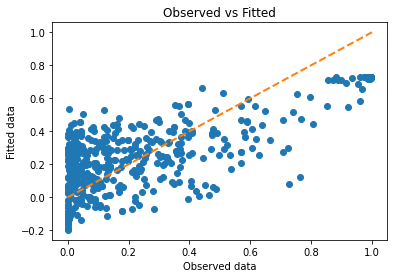

In [177]:
plt.title("Observed vs Fitted") 
plt.xlabel("Observed data") 
plt.ylabel("Fitted data") 
plt.plot(y,yhat, "o") 
plt.plot([0, 1], [0, 1], '--', lw=2)
plt.show()

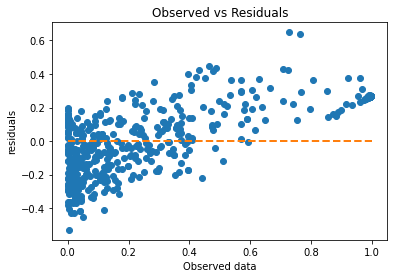

In [178]:
plt.title("Observed vs Residuals") 
plt.xlabel("Observed data") 
plt.ylabel("residuals") 
plt.plot(y,e, "o") 
plt.plot([0, 1], [0, 0], '--', lw=2)
plt.show()

The observed vs residuals plot shows that the variance of the residuals is not constant which means that the normal linear model was not appropriate.

Let's build a confidence interval for the regression line.

In [179]:
mean_energy = df['energy2'].mean()
sd_line_at_mean = (s2/n)**(1/2)
print(sd_line_at_mean)

0.009436558035425853


In [180]:
alpha = 0.05
lower =  0.7243 - 0.9232*mean_energy - st.t.ppf(1 - alpha/2, n-2)*sd_line_at_mean
upper = 0.7243 - 0.9232*mean_energy + st.t.ppf(1 - alpha/2, n-2)*sd_line_at_mean
print(lower, upper)

0.24158717222006676 0.2786741233525002


In [181]:
sd_pred_at_mean = (s2*(1+1/n))**(1/2)
print(sd_pred_at_mean)

0.20436194930501456


In [182]:
alpha = 0.05
lower = 0.7243 - 0.9232*mean_energy - st.t.ppf(1 - alpha/2, n-2)*sd_pred_at_mean
upper = 0.7243 - 0.9232*mean_energy + st.t.ppf(1 - alpha/2, n-2)*sd_pred_at_mean
print(lower, upper)

-0.1414544216188388 0.6617157171914058


In [183]:
def compute_line_sd(x0):
    return((s2*(1/n + (x0 - mean_energy)**2/sum((df['energy2'] - mean_energy)**2)))**(1/2))

In [184]:
compute_line_sd(mean_energy)  

0.009436558035425853

In [185]:
sd_line = compute_line_sd(df['energy2'].sort_values())
sd_line.head()   

271    0.021441
277    0.021441
278    0.021441
308    0.021441
304    0.021441
Name: energy2, dtype: float64

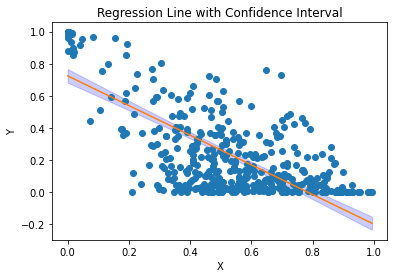

In [186]:
from matplotlib import pyplot as plt 
x     =  df['energy2'].sort_values()
y     =  df['acousticness'].sort_values()
plt.title("Regression Line with Confidence Interval") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.plot(df['energy2'], df['acousticness'], "o") 
plt.plot(x, 0.7243 - 0.9232*x)
plt.fill_between(x = x, y1 = 0.7243 - 0.9232*x - st.t.ppf(1 - alpha/2, n-2)*sd_line, 
                 y2 = 0.7243 - 0.9232*x + st.t.ppf(1 - alpha/2, n-2)*sd_line,
                 facecolor = 'orange', color = 'blue', alpha = 0.2)          
plt.show()

This plot shows that the confidence interval does not reflect most of the data.

Text(0, 0.5, 'instrumentalness')

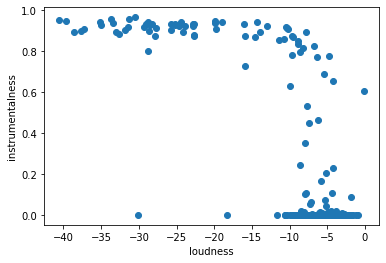

In [187]:
plt.scatter(df['loudness'],df['instrumentalness'])
plt.xlabel('loudness')
plt.ylabel('instrumentalness')

Text(0, 0.5, 'loudness')

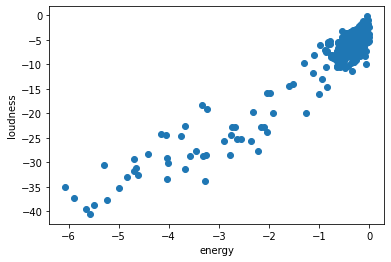

In [188]:
plt.scatter(np.log(df['energy']),df['loudness'])
plt.xlabel('energy')
plt.ylabel('loudness')

In [189]:
df["logenergy"] = np.log(df['energy'])

In [190]:
fitd = smf.ols(formula = 'loudness ~ logenergy', data = df).fit()
fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     4785.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.25e-247
Time:                        17:34:03   Log-Likelihood:                -1019.7
No. Observations:                 468   AIC:                             2043.
Df Residuals:                     466   BIC:                             2052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5473      0.116    -30.566      0.000      -3.775      -3.319
logenergy      6.3965      0.092     69.171      0.000       6.215       6.578
==============================================================================
Omnibus:                       78.930   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.360
Skew:                          -0.809   Prob(JB):                     1.41e-48
Kurtosis:                       5.946   Cond. No.                         1.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
x = df["logenergy"]
y = df['loudness']

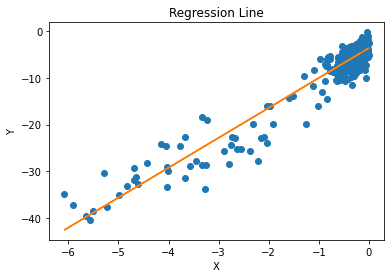

In [192]:
plt.title("Regression Line") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.plot(x, y, "o") 
plt.plot(x, 6.4260*x - 3.5514)
plt.show()

In [193]:
yhat = 6.4260*x - 3.5514
#yhat = fitd.predict()
yhat.head(5)

0   -4.725569
1   -6.459529
2   -4.641267
3   -5.066152
4   -5.626766
Name: logenergy, dtype: float64

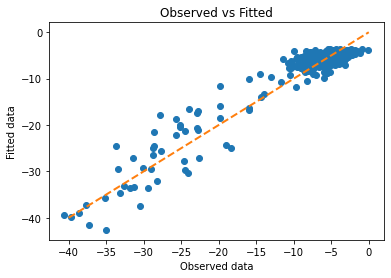

In [194]:
plt.title("Observed vs Fitted") 
plt.xlabel("Observed data") 
plt.ylabel("Fitted data") 
plt.plot(y,yhat, "o") 
plt.plot([-40, 0], [-40, 0], '--', lw=2)
plt.show()

In [195]:
e = y - yhat
e.head(5)

0    2.131569
1   -1.657471
2   -0.228733
3    1.824152
4    0.015766
dtype: float64

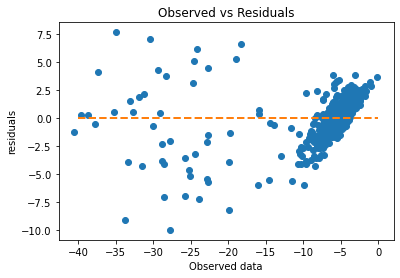

In [196]:
plt.title("Observed vs Residuals") 
plt.xlabel("Observed data") 
plt.ylabel("residuals") 
plt.plot(y,e, "o") 
plt.plot([-40, 0], [0, 0], '--', lw=2)
plt.show()

The model seems to be a good fit based on this plot and R squared value that is 0.912. The observed vs residuals plot in general shows a constant variance of the residuals except for the lower values of Y that are very similar. We conclude that there is a linear relationship between loudness and the log of energy. 

#### We will fit a regression model that tries to describe a song's popularity based on other attributes

We choose the attributes that have the highest correlation with popularity: danceability (0.32), instrumentalness (-0.3), loudness (0.29), valence (0.27), energy (0.24). 

In [197]:
n = len(df)

T_CRITICAL = 1.9384

In [198]:
fitd = smf.ols(formula = 'popularity ~ danceability + loudness + instrumentalness + valence + energy', data = df).fit()

fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     15.21
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           7.54e-14
Time:                        17:34:07   Log-Likelihood:                -1806.9
No. Observations:                 468   AIC:                             3626.
Df Residuals:                     462   BIC:                             3651.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           54.4721      5.234     10.407      0.000      44.186      64.758
danceability        15.5545      4.274      3.639      0.000       7.155      23.954
loudness             0.1270      0.196      0.648      0.517      -0.258       0.512
instrumentalness    -5.5977      2.899     -1.931      0.054     -11.294       0.099
valence              4.7753      3.034      1.574      0.116      -1.186      10.737
energy              -3.2302      4.792     -0.674      0.501     -12.648       6.187
==============================================================================
Omnibus:                       19.704   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.109
Skew:                          -0.486   Prob(JB):                     2.61e-05
Kurtosis:                       3.373   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model estimated coefficients are $\widehat{\beta}_0 = 54.4721$, $\widehat{\beta}_1 = 15.5545$, $\widehat{\beta}_2 = 0.1270$, $\widehat{\beta}_3 = -5.5977$, $\widehat{\beta}_4 = 4.7753$, $\widehat{\beta}_5 = -3.2302$. The regression function is $\widehat{\mu} = 54.4721 + 15.5545*x_1 + 0.1270*x_2 - 5.5977*x_3 + 4.7753*x_4 - 3.2302*x_5$. 

This is our first attempt at a model. We chose the attributes that have the highest correlation with popularity and we added them with a forward stepwise regression method. 

However we previously observed that energy and loudness had a high correlation, also instrumentalness and loudness had a high correlation and also instrumentalness and energy. 

We proceed by adding interaction terms with a forward stepwise regression method and we observe that the R squared result got better when we add all 3 interaction terms.

In [199]:
fitd = smf.ols(formula = 'popularity ~ danceability + loudness + instrumentalness + valence + energy + energy:loudness + instrumentalness:loudness + instrumentalness:energy', data = df).fit()

fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     12.58
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.22e-16
Time:                        17:34:07   Log-Likelihood:                -1796.2
No. Observations:                 468   AIC:                             3610.
Df Residuals:                     459   BIC:                             3648.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    71.5089      6.791     10.530      0.000      58.164      84.854
danceability                 13.3781      4.329      3.090      0.002       4.870      21.886
loudness                      1.1888      0.431      2.757      0.006       0.342       2.036
instrumentalness            -44.5080     11.764     -3.784      0.000     -67.625     -21.391
valence                       3.5454      3.041      1.166      0.244      -2.431       9.521
energy                      -13.2385      6.522     -2.030      0.043     -26.056      -0.422
energy:loudness               0.5031      0.599      0.839      0.402      -0.675       1.681
instrumentalness:loudness    -1.9270      0.579     -3.327      0.001      -3.065      -0.789
instrumentalness:energy      37.1912     12.681      2.933      0.004      12.272      62.111
==============================================================================
Omnibus:                       23.344   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.228
Skew:                          -0.509   Prob(JB):                     2.02e-06
Kurtosis:                       3.555   Cond. No.                         448.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model estimated coefficients are $\widehat{\beta}_0 = 71.5089$, $\widehat{\beta}_1 = 13.3781$, $\widehat{\beta}_2 = 1.1888$, $\widehat{\beta}_3 = -44.5080$, $\widehat{\beta}_4 = 3.5454$, $\widehat{\beta}_5 = -13.2385$, $\widehat{\beta}_6 = 0.5031$, $\widehat{\beta}_7 = -1.9270$, $\widehat{\beta}_8 = 37.1912$. The regression function is $\widehat{\mu} = 71.5089 + 13.3781*x_1 + 1.1888*x_2 - 44.5080*x_3 + 3.5454*x_4 - 13.2385*x_5 + 0.5031*x_6 - 
1.9270*x_7 + 37.1912*x_7$. 

In [200]:
yhat = 71.5089 + 13.3781*df['danceability'] + 1.1888*df['loudness'] - 44.5080*df['instrumentalness'] + 3.5454*df['valence'] - 13.2385*df['energy'] + 0.5031*df['energy']*df['loudness'] - 1.9270*df['instrumentalness']*df['loudness'] + 37.1912*df['energy']*df['instrumentalness']
yhat[1:5]
#yhat

1    60.745972
2    59.579338
3    66.378310
4    62.975616
dtype: float64

In [201]:
y = df['popularity']
e = y - yhat
e

0       4.914694
1      28.254028
2      12.420662
3       3.621690
4       4.024384
         ...    
463     5.485477
464     5.224578
465    -0.037503
466     0.034540
467    -2.228174
Length: 468, dtype: float64

In [202]:
df['el']=df['energy']*df['loudness']
df['ei']=df['energy']*df['instrumentalness']
df['li']=df['loudness']*df['instrumentalness']
xx = df[["instrumentalness","loudness","danceability","valence","energy","el",'ei','li']]
x0 = np.repeat(1, len(y))
x  = np.column_stack((x0, xx))
x = np.array(x)
tx = x.T
XTX_inv = np.linalg.inv(np.matmul(tx, x))
XTY     = np.matmul(tx, y)
beta_hat = np.matmul(XTX_inv, XTY)
beta_hat

array([ 71.5089396 , -44.50804059,   1.18884788,  13.37813309,
         3.54536367, -13.23852098,   0.50309921,  37.19117323,
        -1.92700475])

In [203]:
V_beta_hat = s2*XTX_inv
sd_beta_hat = np.diag(V_beta_hat)**(1/2)
sd_beta_hat

array([0.12219895, 0.21167771, 0.0077584 , 0.07790535, 0.0547212 ,
       0.11736174, 0.01078417, 0.22817979, 0.01042199])

In [204]:
p = 8
SSE = np.sum(e**2)
s2  = SSE/(n-(p+1))
s2_final = s2
print(s2)

128.7076440293139


In [205]:
Mallows_CP = (SSE / s2) - n + 2*(p+1) 
Mallows_CP

9.000000000000057

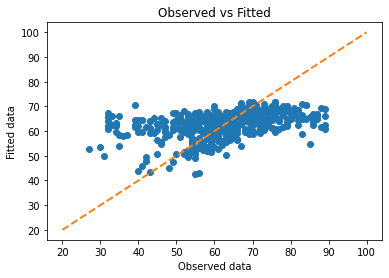

In [206]:
plt.title("Observed vs Fitted") 
plt.xlabel("Observed data") 
plt.ylabel("Fitted data") 
plt.plot(y,yhat, "o") 
plt.plot([20, 100], [20,100], '--', lw=2)
plt.show()

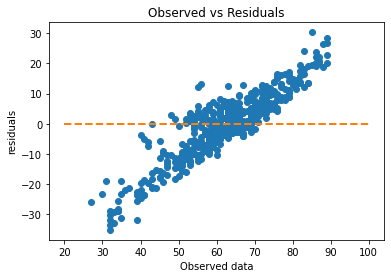

In [207]:
plt.title("Observed vs Residuals") 
plt.xlabel("Observed data") 
plt.ylabel("residuals") 
plt.plot(y,e, "o") 
plt.plot([20, 100], [0, 0], '--', lw=2)
plt.show()

Here is the same regression with standardized variables.

In [208]:
from scipy import stats
df_z = df.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

In [209]:
fitd = smf.ols(formula = 'popularity ~ danceability + loudness + instrumentalness + valence + energy + energy:loudness + instrumentalness:loudness + instrumentalness:energy', data = df_z).fit()

fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     12.58
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.22e-16
Time:                        17:34:12   Log-Likelihood:                -617.67
No. Observations:                 468   AIC:                             1253.
Df Residuals:                     459   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.1837      0.068     -2.701      0.007      -0.317      -0.050
danceability                  0.1761      0.057      3.090      0.002       0.064       0.288
loudness                      0.7282      0.201      3.624      0.000       0.333       1.123
instrumentalness             -0.1227      0.078     -1.566      0.118      -0.277       0.031
valence                       0.0654      0.056      1.166      0.244      -0.045       0.176
energy                       -0.2347      0.103     -2.279      0.023      -0.437      -0.032
energy:loudness               0.0706      0.084      0.839      0.402      -0.095       0.236
instrumentalness:loudness    -0.3514      0.106     -3.327      0.001      -0.559      -0.144
instrumentalness:energy       0.2292      0.078      2.933      0.004       0.076       0.383
==============================================================================
Omnibus:                       23.344   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.228
Skew:                          -0.509   Prob(JB):                     2.02e-06
Kurtosis:                       3.555   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that the variance of the residuals is not constant, in fact the residuals follow some linear pattern. The error variance is very high and the observed vs fitted plot shows that the model is not a good fit for Y.

The adjusted R squared value increased to 0.164 which is greater than the previous attempt (0.126). Furthermore the F statistic has value 13.44 with p-value practically 0. Since the p-value is small we can reject the null hypothesis that the means of our explanatory variables are the same. Furthermore all of the estimated coefficients except for valence and the influence term of energy and loudness have p values practically 0 for their t statistic. In essence this means that we can't reject the null hypothesis (that their coefficients are zero) for the valence attribute and the influence term of energy and loudness. Therefore we reconsider the model without these variables.

In [210]:
fitd = smf.ols(formula = 'popularity ~ danceability + loudness + instrumentalness + energy + instrumentalness:loudness + instrumentalness:energy', data = df).fit()

fitd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     16.39
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           3.84e-17
Time:                        17:34:13   Log-Likelihood:                -1797.3
No. Observations:                 468   AIC:                             3609.
Df Residuals:                     461   BIC:                             3638.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    72.3261      6.662     10.857      0.000      59.235      85.417
danceability                 15.3405      3.982      3.852      0.000       7.515      23.166
loudness                      1.4211      0.344      4.129      0.000       0.745       2.097
instrumentalness            -46.9958     11.398     -4.123      0.000     -69.394     -24.597
energy                      -14.3041      5.695     -2.512      0.012     -25.495      -3.114
instrumentalness:loudness    -2.2148      0.487     -4.548      0.000      -3.172      -1.258
instrumentalness:energy      35.4076     12.627      2.804      0.005      10.594      60.221
==============================================================================
Omnibus:                       23.858   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.562
Skew:                          -0.526   Prob(JB):                     1.71e-06
Kurtosis:                       3.507   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
yhat = 72.3261 + 15.3405*df['danceability'] + 1.4211*df['loudness'] - 46.9958*df['instrumentalness'] - 14.3041*df['energy'] - 2.2148*df['instrumentalness']*df['loudness'] + 35.4076*df['energy']*df['instrumentalness']
yhat[1:5]

1    61.984428
2    60.650101
3    65.607614
4    62.970332
dtype: float64

In [212]:
y = df['popularity']
e = y - yhat
e

0       6.123005
1      27.015572
2      11.349899
3       4.392386
4       4.029668
         ...    
463     5.907113
464     5.476233
465    -0.359514
466     2.278661
467    -1.530951
Length: 468, dtype: float64

In [213]:
p = 6
SSE = np.sum(e**2)
s2  = SSE/(n-(p+1))
print(s2)

128.78154731228733


In [214]:
Mallows_CP = (SSE / s2) - n + 2*(p+1) 
Mallows_CP

7.000000000000057

If we remove the attributes the adjusted R squared value decreases from 0.164 to 0.163 (for this reason they were included through the stepwise process). However the Mallows cp statistic decreases from 9 to 7. In both cases theory tells us that both models are biased because a model is considered unbiased if Mallows cp static is less than $(p+1)$, where p is the number of explanatory variables for that model, which in the first case is 8 while in the second one is 6.

We thus conclude that our best model is the one with the energy-loudness influence term and valence. Nonetheless, we highlight that even this model is not a good fit. In general the R-squared and Malloc cp statistic values obtained are indicators that the Y cannot be explained well by its variables and that it is biased. We suppose it makes sense that we obtain such a low R squared value since the correlation coefficients found in the exploratory data analysis between the independent variables and the dependent one were low. On the other hand t statistics show that they are significant variables in the model so perhaps the issue is that the model needs the influence of other explanatory variables that we did not have in our dataset. We notice that the observed vs residuals plot shows that homoscedasticity is violated in this model. This is a problem since it means that the population has unequal variance and therefore the model violates an assumption of OLS.  

We next find a CI for the regression line value $\mathbb{E}(Y_0)$ and a prediction interval for a new observation $Y_0$, at fixed values of the explanatory variable. 

In [215]:
CI_lower_beta1 = beta_hat - st.t.ppf(1 - alpha/2, n-1)*sd_beta_hat
CI_upper_beta1 = beta_hat + st.t.ppf(1 - alpha/2, n-1)*sd_beta_hat
print(np.column_stack((CI_lower_beta1, CI_upper_beta1)))

[[ 71.26881172  71.74906747]
 [-44.9239993  -44.09208187]
 [  1.17360218   1.20409358]
 [ 13.22504466  13.53122153]
 [  3.43783341   3.65289392]
 [-13.46914346 -13.00789851]
 [  0.4819077    0.52429071]
 [ 36.74278699  37.63955947]
 [ -1.94748455  -1.90652496]]


We find the 95% CI for the individual effects. Here we notice that the valence and energy and loudness include the 0.

In [216]:
sd_line_at_mean = (s2_final/n)**(1/2)
print(sd_line_at_mean)

0.5244199971358547


In [217]:
alpha = 0.05
lower = 71.5089 + 13.3781*df['danceability'].mean() + 1.1888*df['loudness'].mean() - 44.5080*df['instrumentalness'].mean() + 3.5454*df['valence'].mean() - 13.2385*df['energy'].mean() + 0.5031*df['el'].mean() - 1.9270*df['li'].mean() + 37.1912*df['ei'].mean() - st.t.ppf(1 - alpha/2, n-2)*sd_line_at_mean
upper = 71.5089 + 13.3781*df['danceability'].mean() + 1.1888*df['loudness'].mean() - 44.5080*df['instrumentalness'].mean() + 3.5454*df['valence'].mean() - 13.2385*df['energy'].mean() + 0.5031*df['el'].mean() - 1.9270*df['li'].mean() + 37.1912*df['ei'].mean() + st.t.ppf(1 - alpha/2, n-2)*sd_line_at_mean
print(lower, upper)

61.501862651109526 63.56290426539666


In [218]:
sd_pred_at_mean = (s2*(1+1/n))**(1/2)
print(sd_pred_at_mean)

11.360313444561339


In [219]:
alpha = 0.05
lower = 71.5089 + 13.3781*df['danceability'].mean() + 1.1888*df['loudness'].mean() - 44.5080*df['instrumentalness'].mean() + 3.5454*df['valence'].mean() - 13.2385*df['energy'].mean() + 0.5031*df['el'].mean() - 1.9270*df['li'].mean() + 37.1912*df['ei'].mean() - st.t.ppf(1 - alpha/2, n-2)*sd_pred_at_mean
upper = 71.5089 + 13.3781*df['danceability'].mean() + 1.1888*df['loudness'].mean() - 44.5080*df['instrumentalness'].mean() + 3.5454*df['valence'].mean() - 13.2385*df['energy'].mean() + 0.5031*df['el'].mean() - 1.9270*df['li'].mean() + 37.1912*df['ei'].mean() + st.t.ppf(1 - alpha/2, n-2)*sd_pred_at_mean
print(lower, upper)

40.20859823985596 84.85616867665023


At the mean value for the explanatory variables, we find the 95% CI of (61.50, 63.56) for the mean of popularity and 95% prediction interval of (40.22, 84.85) for a new observation $Y_0$. We can notice that both intervals are quite precise, with the prediction interval naturally being less precise than the confidence one. This means that the mean popularity of a song given our parameters will fall with 95% certainty in the interval (61.50, 63.56) while a single future song will fall in the popularity interval (40.22, 84.85) with the same probability.

Overall this shows that our sample included songs that were rather popular. This leads us to question the effects of our sampling methods on our results.